# Question: Does one page Engage users for a long period of time?

In addition to computing the enrollment rate, we can also compute the average reading duration with the dataset. The two analysis so far, were comparing proportion. With this metric we will be analyzing  the difference in mean. This analyziz will be quiet similar. Since we are comparing reading duration, We only care about __"view"__ action, So lets filter by the view action first.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%matplotlib inline

In [69]:
#import the course page action dataset
df = pd.read_csv('course_page_actions.csv')

In [70]:
#filter the view action and give a new name for the data frame
views = df.query('action == "view"')

In [71]:
views

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4067,2017-01-18 08:35:44.813986,313521,control,view,131.677707
4069,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4071,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4072,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


And lets only count each unique user once by finding the average rading duration if they visted more than once by Grouping the 'id', 'group' column only once by calculating the mean of 'duration'

In [72]:
reading_times = views.groupby(['id','group'])['duration'].mean()

Resetting the index would be nice to keep only id and group as column name, this is not necessary but a great practive and it also allow us to work in a dataframe instead of a multi index series.

In [73]:
reading_times = reading_times.reset_index()

In [74]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


Now find the average reading duration for each group like this

In [75]:
control_mean = df.query('group =="control"')['duration'].mean()
experiment_mean = df.query('group =="experiment"')['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [76]:
obs_mean = experiment_mean - control_mean
obs_mean

15.525098619574393

On average it looks like the user from the experiment grop spend 15 more seconds on the course overview page than the user from control group

To see if the difference is significant lets simulate the sampling distribution for the difference in mean reading duration with bootstrapping

In [77]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_mean = b_samp.query('group =="control"')['duration'].mean()
    experiment_mean = b_samp.query('group =="experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [78]:
diffs = np.array(diffs)

Lets see how the sampling distribution looks like

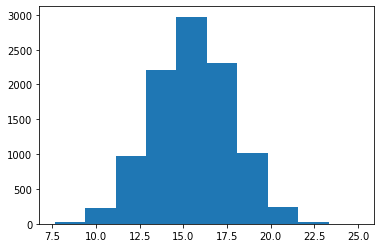

In [62]:
plt.hist(diffs);

now to find the p value lets simulate the distribution under the null and find the probability that our observed statistics came from this distribution. Will create the distributoin centered at zero and having the same spread as our sampling distribution.

In [82]:
null_vals  = np.random.normal(0, diffs.std(), diffs.size)

Lets have a look at where our observer mean fall in our null distribution.

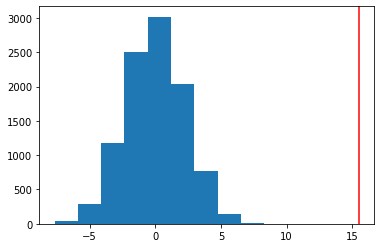

In [86]:
plt.hist(null_vals);
plt.axvline(x=obs_mean, color = 'red');

Our statistic deafinitely doesnt looks like it came from the null distribution. Looks like the difference we observed is significant.

$$H_{0}: CTR_{new} - CTR_{old} \leq 0$$

$$H_{1}: CTR_{new} - CTR_{old} > 0$$


In [87]:
(null_vals > obs_mean).mean()

0.0

__Again, let's recap the steps we took to analyze the results of this A/B test.__

1. We computed the __observed difference__ between the metric, average reading duration, for the control and experiment group.
2. We simulated the __sampling distribution__ for the difference in means (or average reading durations).
3. We used this sampling distribution to simulate the __distribution under the null__ hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
4. We computed the __p-value by__ finding the proportion of values in the null distribution that were greater than our observed difference.
5. We used this p-value to determine the __statistical significance__ of our observed difference.